#Introduction
This notebook was written in Google Colab and you will need to log in with your Google account in order to download the pre-trained model for the evaluation.

---

*Note 1*: To save the user from the hassle of uploading files, a GitHub repository will be downloaded. Make sure you are always within the `content/ILSVRCPlus` directory.

You can always check your current working directory by using the magic: `%pwd`

---

*Note 2*: If you are impatient and you don't want to train the model, skip to Section 5 to download the pre-trained model from Google Drive and evaluate it.

Make sure you downloaded the dataset first, from Section 2.

In [1]:
!git clone https://github.com/kaseris/ILSVRCPlus.git

Cloning into 'ILSVRCPlus'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 426 (delta 89), reused 98 (delta 40), pack-reused 277
Receiving objects: 100% (426/426), 25.33 MiB | 9.11 MiB/s, done.
Resolving deltas: 100% (238/238), done.


In [1]:
%cd ILSVRCPlus

/content/ILSVRCPlus


##2. Download the CIFAR-10 dataset
We download the CIFAR-10 dataset and we show some of its samples. The GoogLeNet model will be trained on this dataset.

Using TensorFlow backend.


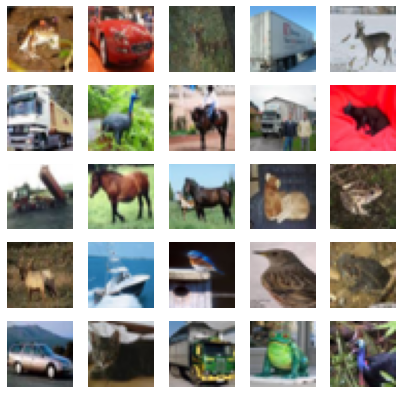

In [2]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(trainX, trainY), (testX, testY) = cifar10.load_data()
fig, ax = plt.subplots(5, 5, figsize=(7,7))
for i in range(0, 5):
  for j in range(0, 5):
    ax[i][j].axis('off')
    ax[i][j].imshow(trainX[i + 5 * j, :, :])

##3. Train the model
In this cell, we import and instantiate a ResNet architecture and train on the CIFAR-10 dataset. You can skip this step and download the pretrained model from the Google Drive folder:

https://drive.google.com/drive/folders/16AeENomjhIT1C3vmw1fc85xP2SSlZe5z?usp=sharing

In [0]:
import ResNetCIFAR

Using TensorFlow backend.


In [0]:
resnet = ResNetCIFAR.ResNetCIFAR(version=1, n=20)

In [0]:
history = resnet.train()

[INFO]: Downloading dataset
[INFO]: Compiling model...
Learning rate:  0.001
[INFO]: Training model
Epoch 1/200
Learning rate:  0.001
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5783 - accuracy: 0.4866 - val_loss: 1.4599 - val_accuracy: 0.5332
Epoch 2/200
Learning rate:  0.001
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2018 - accuracy: 0.6276 - val_loss: 1.0828 - val_accuracy: 0.6759
Epoch 3/200
Learning rate:  0.001
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0376 - accuracy: 0.6942 - val_loss: 1.3651 - val_accuracy: 0.6149
Epoch 4/200
Learning rate:  0.001
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9368 - accuracy: 0.7323 - val_loss: 1.1349 - val_accuracy: 0.6832
Epoch 5/200
Learning rate:  0.001
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8667 - accuracy: 0.7582 - val_loss: 1.4058 - val_accuracy: 0.6593
Epoch 6/200
Learning rate:  0.001
1563/1563 [==========

##4. Model evaluation

###4.1 Evaluate the trained model
You will be asked to log in with you Google account credentials to get the verification code. The verification code will look like this:

Use Chrome if the image does not appear.

<figure>
<center>
<img src="https://drive.google.com/uc?id=1o8yYGesQA6qc9vL8zFr4nz_AuLDe8LFn" width="400">
</figure>

Copy your code and paste it to the prompt that will pop out after executing the cell below.

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = "1Iq8wgpqvmL8yc8aQJyg0AuSP_Xc_XX4v" # The saved model for the Mini GoogLeNet
downloaded = drive.CreateFile({'id':file_id})
filename = 'ResNetv1-20-weights-improvement-176-0.92.hdf5'
downloaded.GetContentFile(filename)

In [0]:
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np
resnet_cifar = load_model(filename)

try:
  trainX = trainX.astype(np.float32) / 255
  testX = testX.astype(np.float32) / 255

  mean = np.mean(trainX, axis=0)
  testX -= mean

  testY = to_categorical(testY, 10)
except NameError:
  print("The variable is not defined. Make sure you downloaded the dataset at the second cell.")

In [5]:
test_loss, test_accuracy = resnet_cifar.evaluate(testX, testY)
print("[INFO]: Evaluating the model on the test set")
print("Test loss: {:.3f}".format(test_loss))
print("Test accuracy: {:.3f}".format(test_accuracy))

10000/10000 [==============================] - 4s 423us/step
[INFO]: Evaluating the model on the test set
Test loss: 0.445
Test accuracy: 0.916
